# Regressão Softmax com dados do MNIST

## Objetivo

O objetivo deste notebook é ilustrar o uso de praticamente a mesma rede desenvolvida para a classificação das flores Íris, porém agora com o problema de classificação de dígitos manuscritos utilizando o dataset MNIST.
As principais diferenças são:
- tipo do dado, agora imagem com muito atributos: 28 x 28 pixels
- número de amostras, muito maior, 60 mil
Neste exercício será possível a interpretação do significado dos parâmetros treinados

## Importação das bibliotecas

In [1]:
! pip install Pillow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable

import torchvision

## Carregamento dos dados do MNIST

In [3]:
! git clone https://github.com/vcasadei/MNIST.git

Cloning into 'MNIST'...
Updating files: 100% (6/6)
Updating files: 100% (6/6), done.


In [4]:
!ls MNIST

'ls' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [5]:
dataset_dir = 'MNIST/'

x_train, y_train = torch.load(dataset_dir + 'processed/training.pt')

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 60000

Dimensões dos dados das imagens:    torch.Size([60000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0, dtype=torch.uint8) tensor(255, dtype=torch.uint8)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Carregamento, normalização e seleção dos dados do MNIST

Neste exemplo utilizaremos apenas 1000 amostras de treinamento.

In [6]:
x_train = x_train.float()

x_train = x_train / 255.

if True:
    n_samples_train = 1000

    x_train = x_train[:n_samples_train]
    y_train = y_train[:n_samples_train]

print("Amostras de treinamento:", x_train.size(0))

print("\nDimensões dos dados das imagens:   ", x_train.size())
print("Valores mínimo e máximo dos pixels:", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:        ", type(x_train))
print("Tipo das classes das imagens:      ", type(y_train))

Amostras de treinamento: 1000

Dimensões dos dados das imagens:    torch.Size([1000, 28, 28])
Valores mínimo e máximo dos pixels: tensor(0.) tensor(1.)
Tipo dos dados das imagens:         <class 'torch.Tensor'>
Tipo das classes das imagens:       <class 'torch.Tensor'>


### Visualizando os dados

(-0.5, 232.5, 87.5, -0.5)

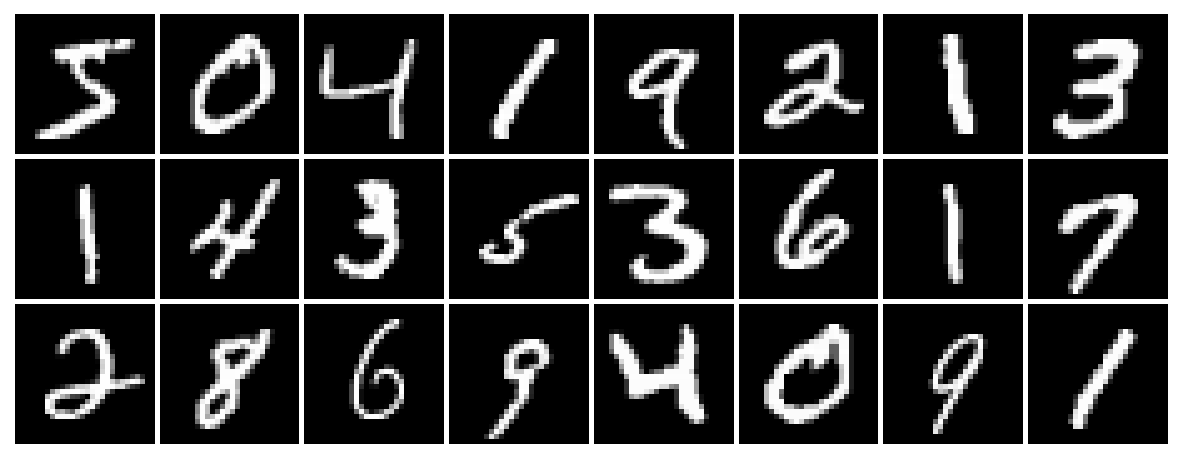

In [7]:
n_samples = 24

# cria um grid com as imagens
grid = torchvision.utils.make_grid(x_train[:n_samples].unsqueeze(dim=1), pad_value=1.0, padding=1)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off')

### Visualizando uma imagem com o matplotlib

class: tensor(5)


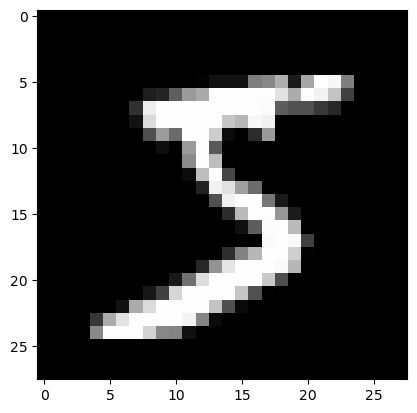

In [8]:
image  = x_train[0]
target = y_train[0]

plt.imshow(image.numpy(), cmap='gray')
print('class:', target)

## Modelo

In [9]:
model = torch.nn.Linear(28*28, 10) # 28*28 atributos de entrada e 10 neurônios na sáida

### Testando um predict com poucas amostras

In [10]:
xin = x_train[:5].view(-1,28*28)
score = model(Variable(xin))
score

tensor([[-1.8857e-01,  7.0443e-02, -1.1879e-02,  1.6019e-02, -2.3421e-01,
          1.0431e-01,  1.1751e-01,  9.3340e-02,  4.8781e-01, -1.3254e-01],
        [-1.0601e-01,  2.3659e-01,  1.8142e-01,  2.0841e-02, -3.8108e-01,
          4.7832e-01,  1.4420e-01, -3.0376e-02,  5.7787e-01,  8.9447e-02],
        [-4.0114e-02,  1.6250e-02,  1.3919e-01,  1.8688e-01, -1.4737e-01,
         -8.9633e-02,  4.9093e-02,  1.1310e-01,  7.5711e-02, -4.6122e-02],
        [ 1.2090e-01, -1.1014e-01,  1.6366e-02,  4.0663e-01,  4.6178e-02,
         -2.2000e-01, -1.3781e-01, -1.4149e-01,  6.0661e-02,  7.0630e-02],
        [ 1.0145e-02,  2.9267e-04,  2.1912e-01,  1.7426e-01,  2.0084e-01,
         -6.2103e-02, -5.4765e-02, -2.1149e-01,  1.9086e-01,  1.4009e-01]],
       grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [11]:
epochs = 100
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Visualização do grafo computacional da perda (loss)

In [12]:
!pip install graphviz
!pip install git+https://github.com/szagoruyko/pytorchviz

  Cloning https://github.com/szagoruyko/pytorchviz to c:\users\samsung\appdata\local\temp\pip-req-build-3tk382g0
  Resolved https://github.com/szagoruyko/pytorchviz to commit 0adcd83af8aa7ab36d6afd139cabbd9df598edb7
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/szagoruyko/pytorchviz 'C:\Users\Samsung\AppData\Local\Temp\pip-req-build-3tk382g0'


In [13]:
from torchviz import make_dot, make_dot_from_trace
y_pred = model(Variable(x_train.view(-1,28*28)))
loss = criterion(y_pred, Variable(y_train))
loss


tensor(2.3293, grad_fn=<NllLossBackward0>)

In [14]:
p = make_dot(loss, dict(model.named_parameters()))
p

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### Laço de treinamento dos pesos

In [25]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    print(f'epoch: [{i+1}:{epochs}]  |  loss: {loss}  |  accuracy: {accuracy}')


epoch: [1:100]  |  loss: 0.17753878235816956  |  accuracy: 0.967
epoch: [2:100]  |  loss: 0.17697006464004517  |  accuracy: 0.967
epoch: [3:100]  |  loss: 0.17640480399131775  |  accuracy: 0.967
epoch: [4:100]  |  loss: 0.17584307491779327  |  accuracy: 0.967
epoch: [5:100]  |  loss: 0.1752847135066986  |  accuracy: 0.967
epoch: [6:100]  |  loss: 0.17472976446151733  |  accuracy: 0.967
epoch: [7:100]  |  loss: 0.17417816817760468  |  accuracy: 0.967
epoch: [8:100]  |  loss: 0.17362987995147705  |  accuracy: 0.967
epoch: [9:100]  |  loss: 0.17308489978313446  |  accuracy: 0.967
epoch: [10:100]  |  loss: 0.17254319787025452  |  accuracy: 0.967
epoch: [11:100]  |  loss: 0.17200466990470886  |  accuracy: 0.967
epoch: [12:100]  |  loss: 0.17146936058998108  |  accuracy: 0.967
epoch: [13:100]  |  loss: 0.1709372103214264  |  accuracy: 0.967
epoch: [14:100]  |  loss: 0.1704082190990448  |  accuracy: 0.967
epoch: [15:100]  |  loss: 0.16988231241703033  |  accuracy: 0.967
epoch: [16:100]  |  lo

In [16]:
print('Final loss:', loss.item())

Final loss: 0.26513808965682983


### Visualizando gráfico de perda durante o treinamento

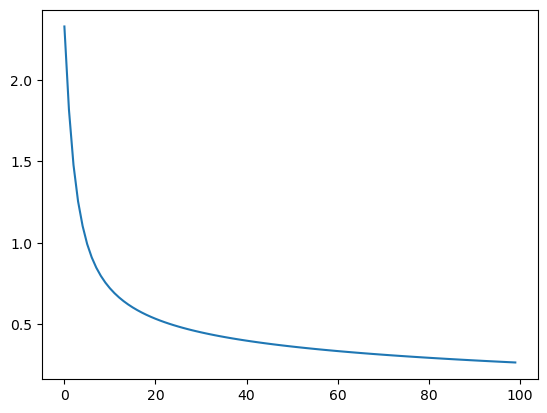

In [17]:
plt.plot(losses)

## Avaliação

### Acurácia tanto no conjunto de treinamento como no conjunto de testes

In [18]:
def predict(model, input_data):
    outputs = model(Variable(input_data))
    _, predicts = torch.max(outputs, 1)

    return predicts.data

y_pred = predict(model, x_train.view(-1, 28*28))
accuracy = (y_pred.numpy() == y_train.numpy()).mean()
print('Accuracy:', accuracy)

Accuracy: 0.941


### Matriz de confusão com dados de treinamento e teste

In [19]:
print('Matriz de confusão:')
pd.crosstab(y_pred.numpy(), y_train.numpy())

Matriz de confusão:


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,96,0,1,0,0,0,1,0,0,2
1,0,110,2,0,0,0,1,3,1,0
2,0,1,90,1,0,1,0,1,2,1
3,0,0,0,88,0,2,0,0,0,0
4,0,0,1,0,102,1,1,1,0,3
5,0,2,0,1,0,82,0,0,2,1
6,1,0,1,1,2,2,90,0,0,0
7,0,1,1,1,0,0,0,111,0,3
8,0,2,2,0,0,2,1,0,82,0


## Visualizando a matriz de pesos treinados

Observe que a matriz de peso treinado para cada classe mostra a importância dos pesos associados aos caracteres de cada classe.

weights: torch.Size([10, 784])
bias:    torch.Size([10])


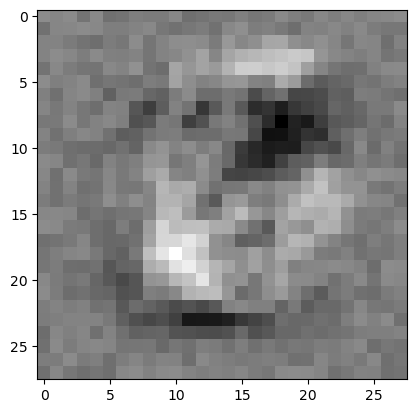

In [21]:
weights = model.state_dict()['weight']
print('weights:', weights.shape)

bias = model.state_dict()['bias']
print('bias:   ', bias.shape)

# Visualizando pesos da classe 3
plt.imshow(weights[6, :].numpy().reshape((28,28)),cmap = 'gray')
plt.show()

### Visualizando os pesos de todas as classes

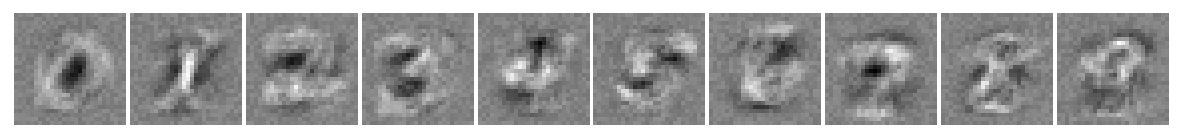

In [22]:
# cria um grid com as imagens
grid = torchvision.utils.make_grid(weights.view(-1, 1, 28, 28), normalize=True, pad_value=1.0, padding=1, nrow=10)

plt.figure(figsize=(15, 10))
plt.imshow(grid.numpy().transpose(1, 2, 0))
plt.axis('off');

### Diagrama da regressão softmax com visualização dos pesos W

![alt text](https://raw.githubusercontent.com/vcasadei/images/master/RegressaoSoftmaxArgmaxNMIST.png)

# Atividades

## Exercícios

- 1) Insira código no laço do treinamento para que no final de cada época,
     seja impresso: o número da época e a perda e a acurácia 
     OK

In [26]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    print(f'epoch: [{i+1}:{epochs}]  |  loss: {loss}  |  accuracy: {accuracy}')

epoch: [1:100]  |  loss: 0.13373716175556183  |  accuracy: 0.977
epoch: [2:100]  |  loss: 0.13340029120445251  |  accuracy: 0.978
epoch: [3:100]  |  loss: 0.13306492567062378  |  accuracy: 0.978
epoch: [4:100]  |  loss: 0.13273108005523682  |  accuracy: 0.978
epoch: [5:100]  |  loss: 0.13239873945713043  |  accuracy: 0.978
epoch: [6:100]  |  loss: 0.13206790387630463  |  accuracy: 0.978
epoch: [7:100]  |  loss: 0.1317385733127594  |  accuracy: 0.978
epoch: [8:100]  |  loss: 0.1314106583595276  |  accuracy: 0.978
epoch: [9:100]  |  loss: 0.13108426332473755  |  accuracy: 0.978
epoch: [10:100]  |  loss: 0.1307593137025833  |  accuracy: 0.978
epoch: [11:100]  |  loss: 0.13043580949306488  |  accuracy: 0.978
epoch: [12:100]  |  loss: 0.13011375069618225  |  accuracy: 0.978
epoch: [13:100]  |  loss: 0.12979310750961304  |  accuracy: 0.978
epoch: [14:100]  |  loss: 0.12947390973567963  |  accuracy: 0.978
epoch: [15:100]  |  loss: 0.12915609776973724  |  accuracy: 0.978
epoch: [16:100]  |  lo

- 2) Insira código no laço do treinamento para visualização dos valores dos gradientes referentes à classe do dígito 4, no final de cada época.

epoch: [1:100


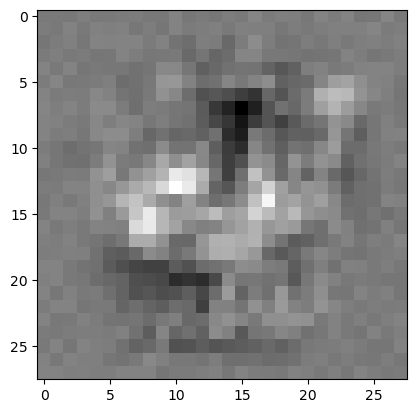

epoch: [2:100


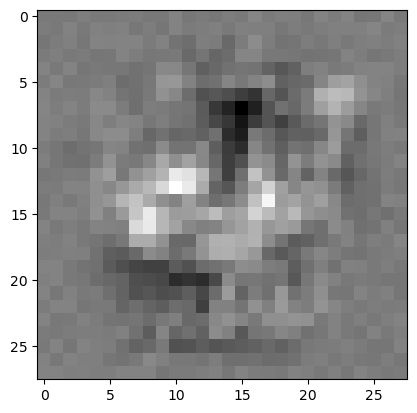

epoch: [3:100


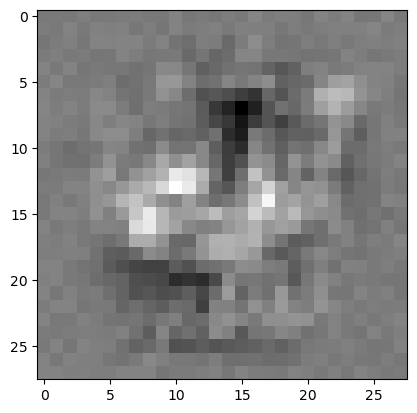

epoch: [4:100


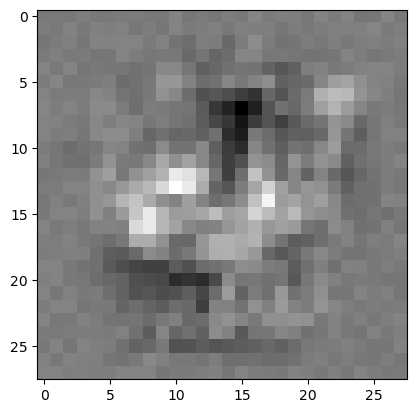

epoch: [5:100


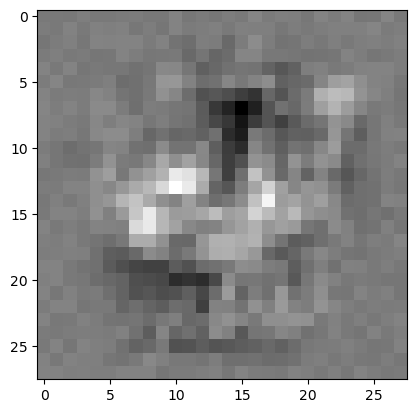

epoch: [6:100


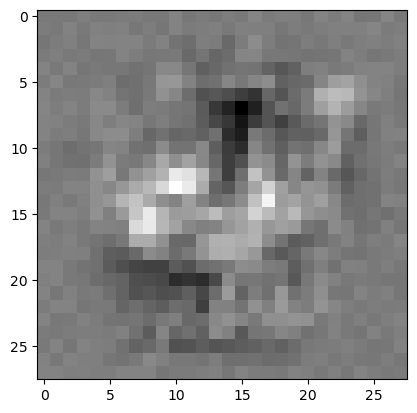

epoch: [7:100


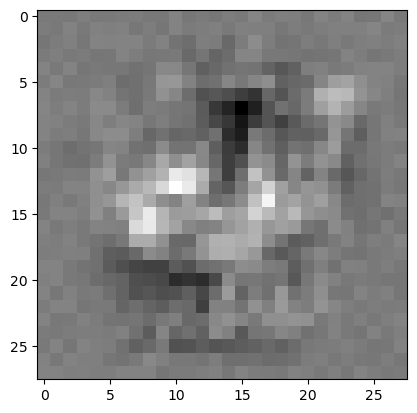

epoch: [8:100


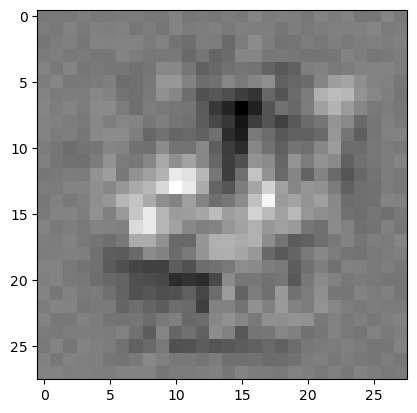

epoch: [9:100


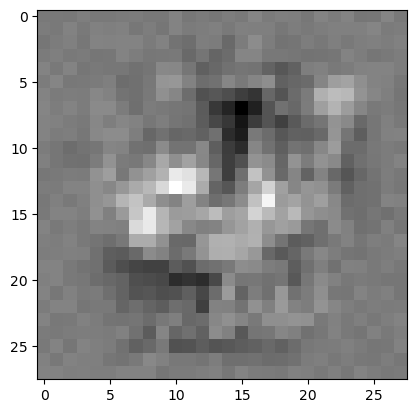

epoch: [10:100


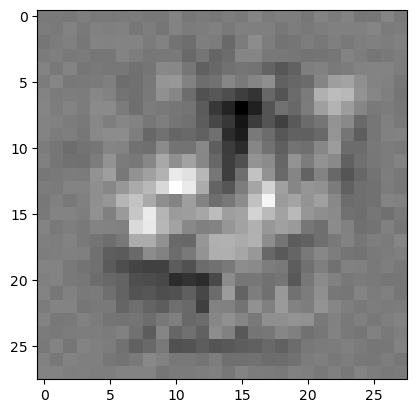

epoch: [11:100


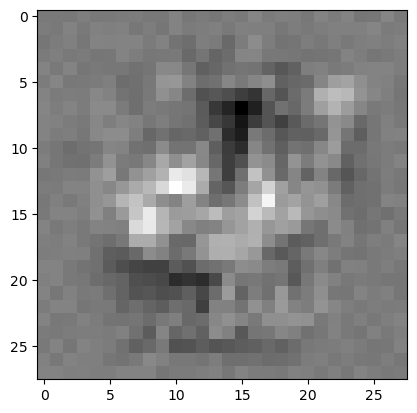

epoch: [12:100


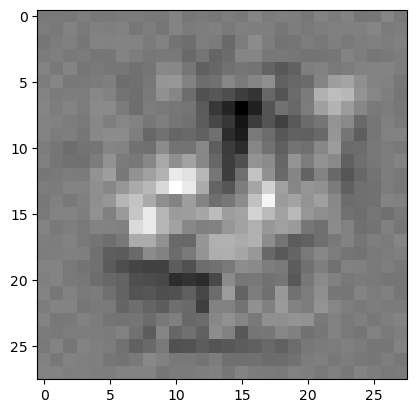

epoch: [13:100


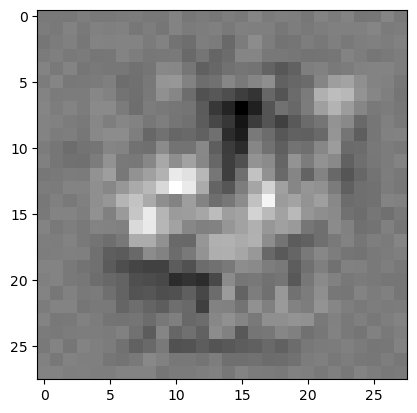

epoch: [14:100


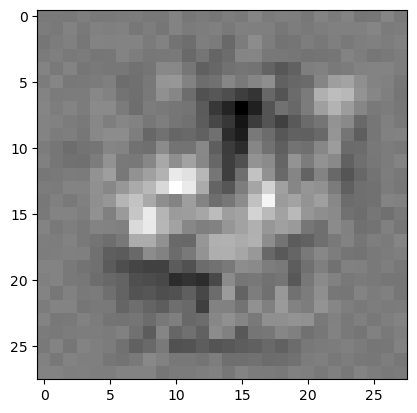

epoch: [15:100


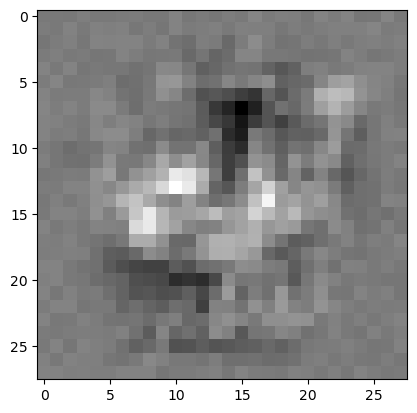

epoch: [16:100


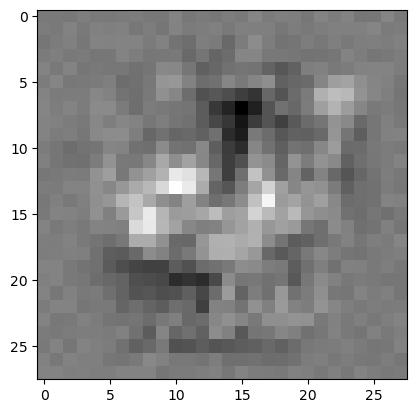

epoch: [17:100


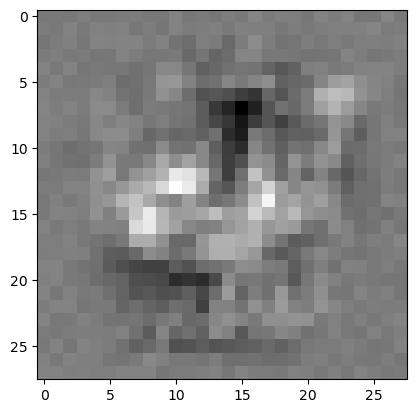

epoch: [18:100


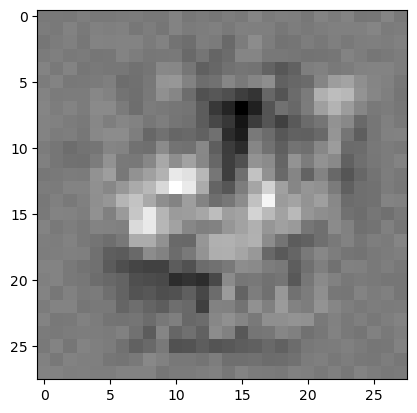

epoch: [19:100


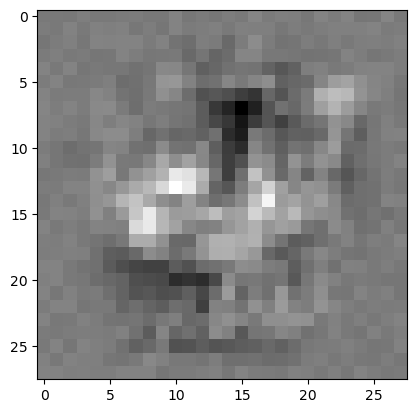

epoch: [20:100


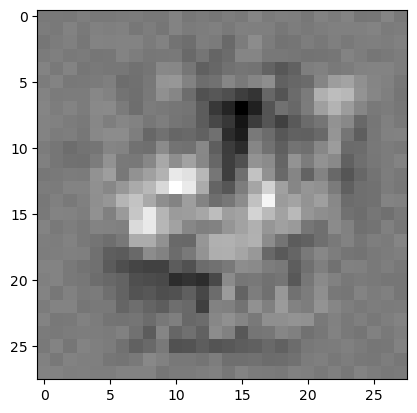

epoch: [21:100


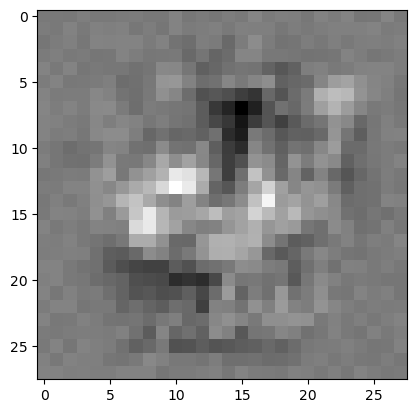

epoch: [22:100


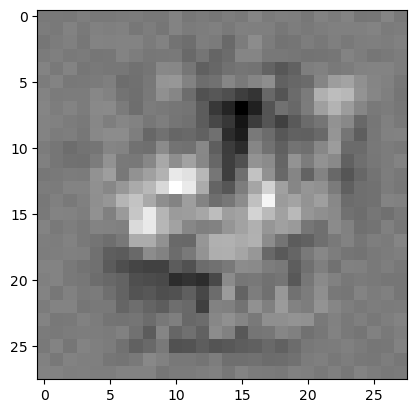

epoch: [23:100


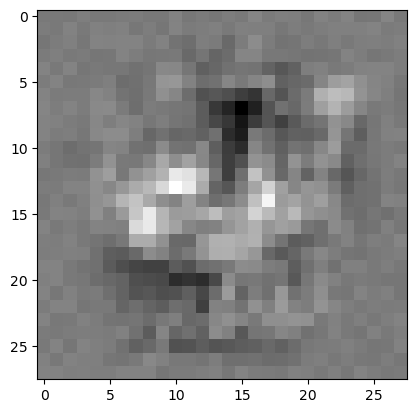

epoch: [24:100


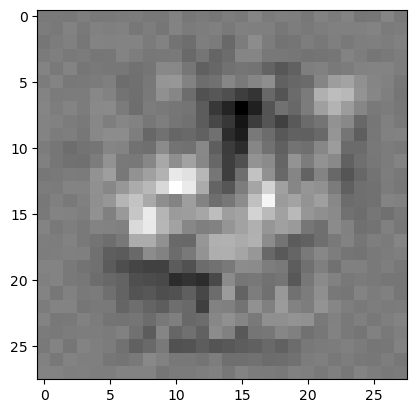

epoch: [25:100


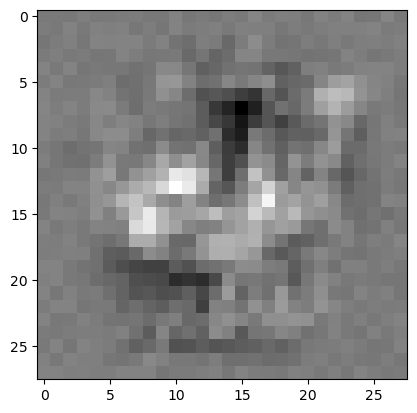

epoch: [26:100


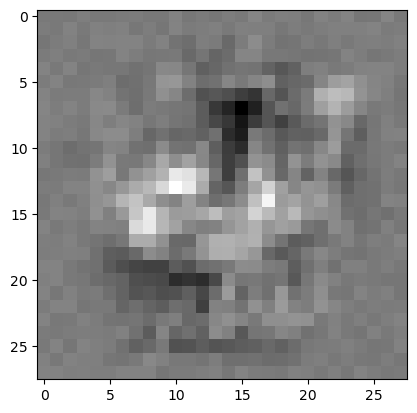

epoch: [27:100


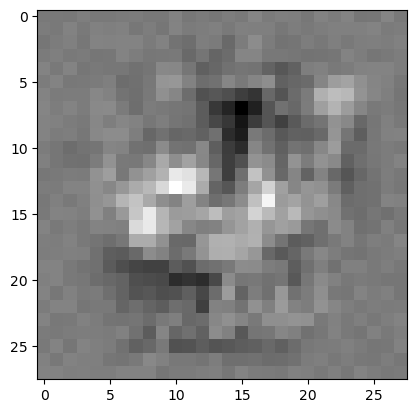

epoch: [28:100


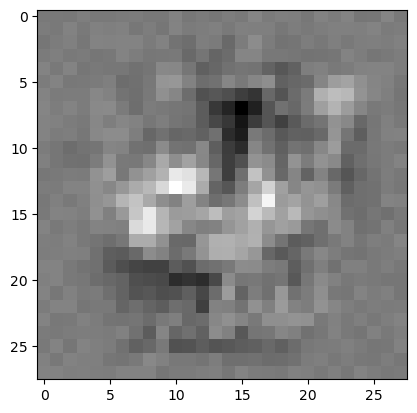

epoch: [29:100


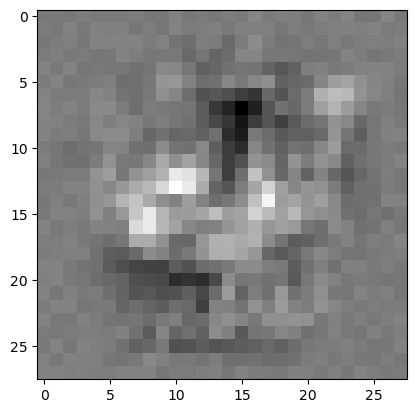

epoch: [30:100


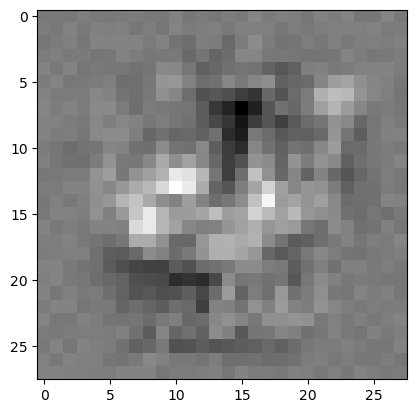

epoch: [31:100


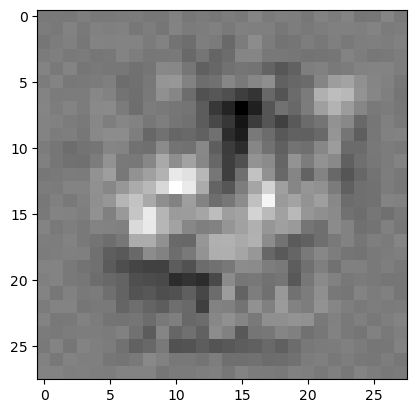

epoch: [32:100


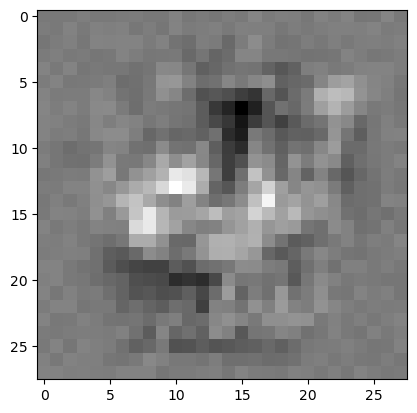

epoch: [33:100


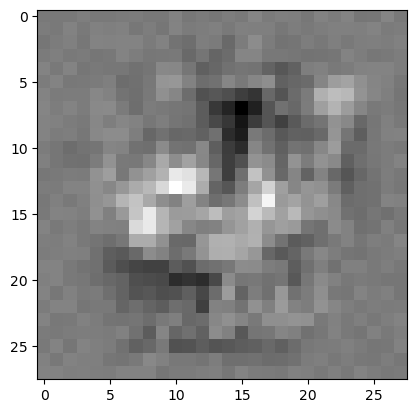

epoch: [34:100


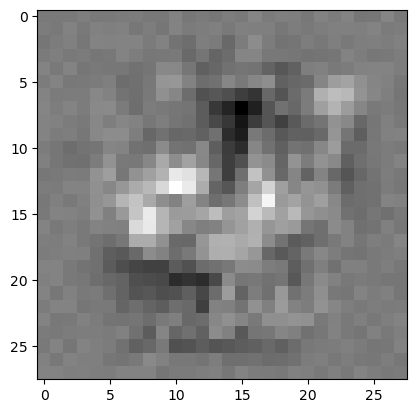

epoch: [35:100


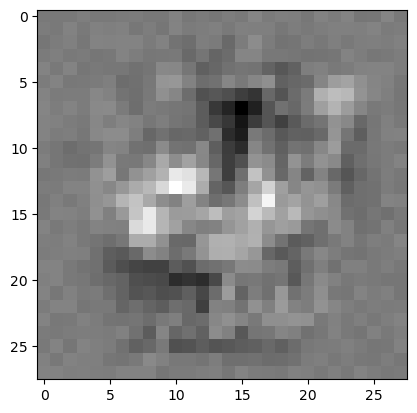

epoch: [36:100


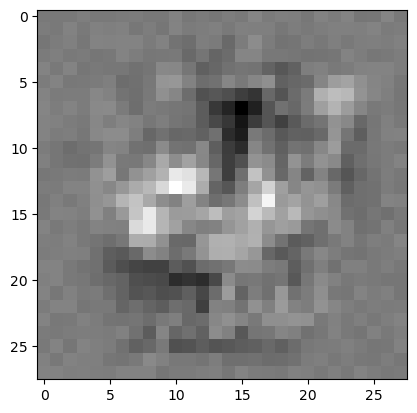

epoch: [37:100


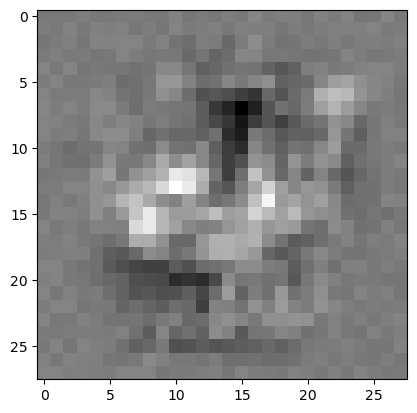

epoch: [38:100


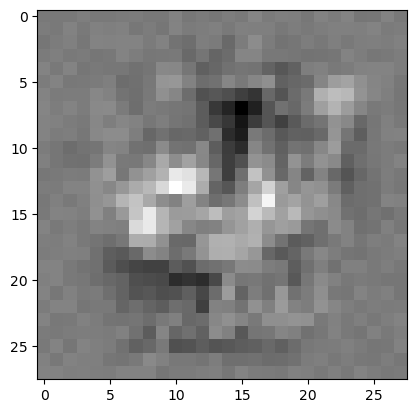

epoch: [39:100


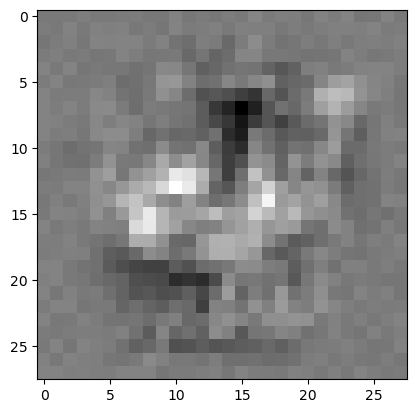

epoch: [40:100


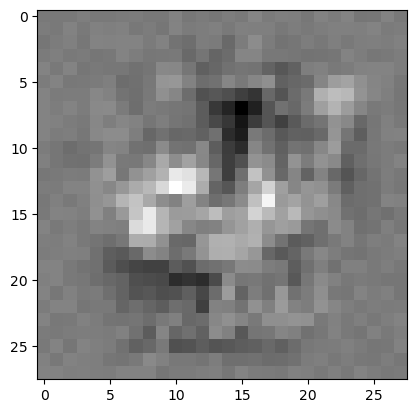

epoch: [41:100


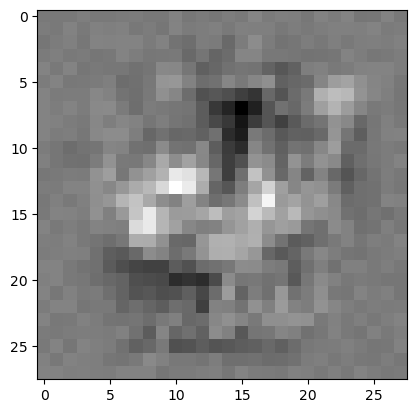

epoch: [42:100


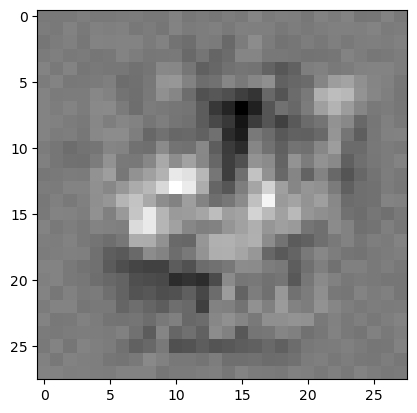

epoch: [43:100


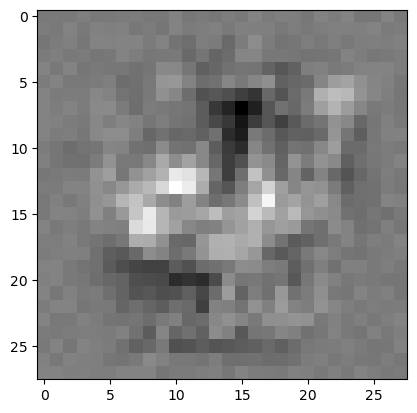

epoch: [44:100


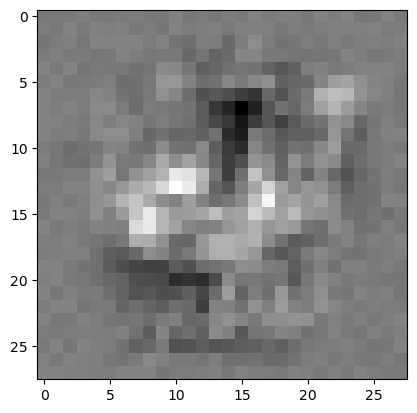

epoch: [45:100


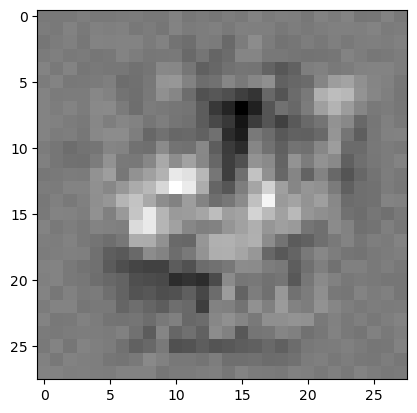

epoch: [46:100


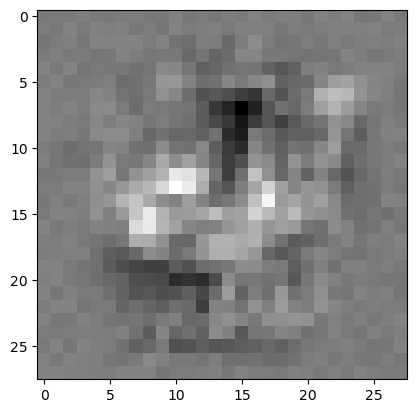

epoch: [47:100


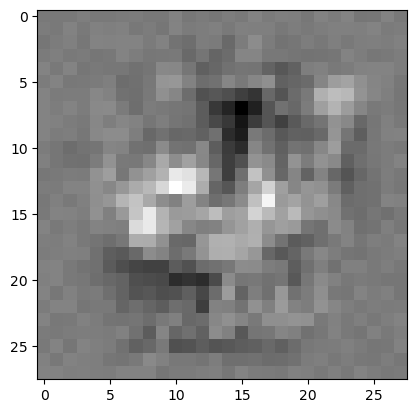

epoch: [48:100


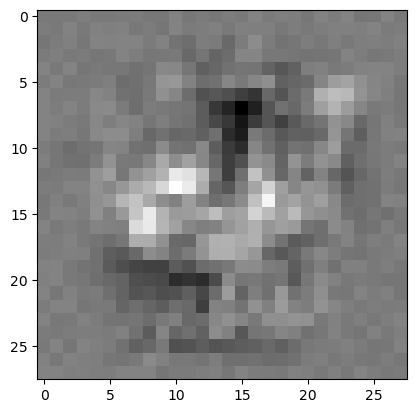

epoch: [49:100


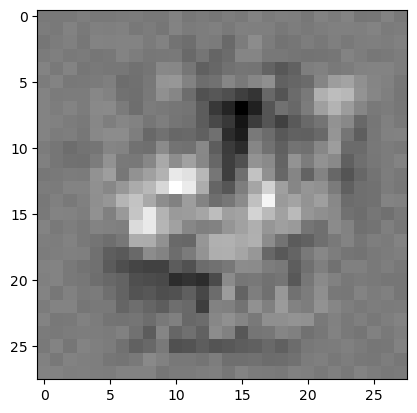

epoch: [50:100


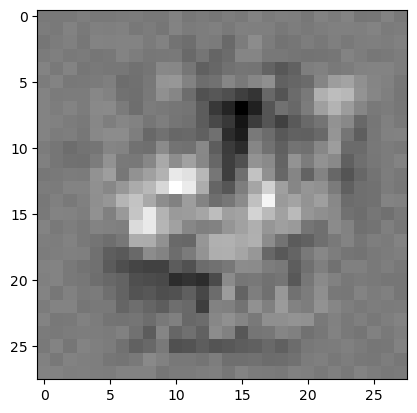

epoch: [51:100


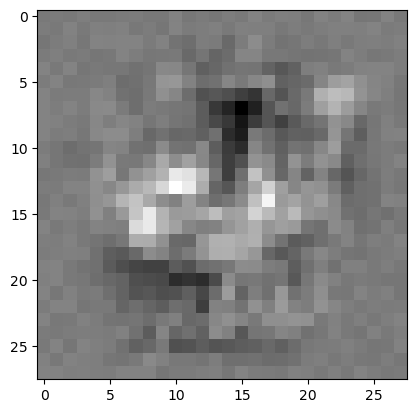

epoch: [52:100


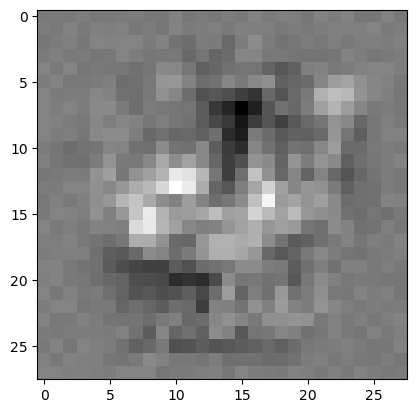

epoch: [53:100


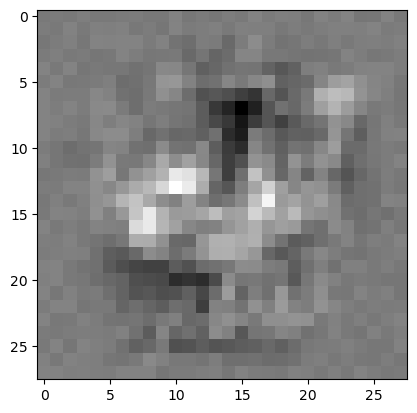

epoch: [54:100


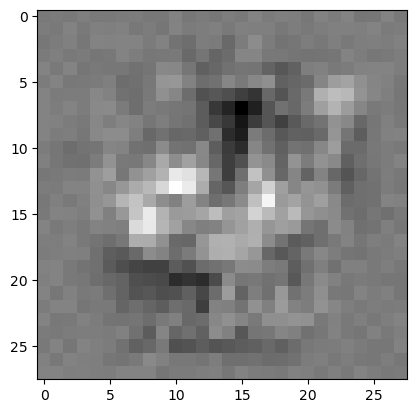

epoch: [55:100


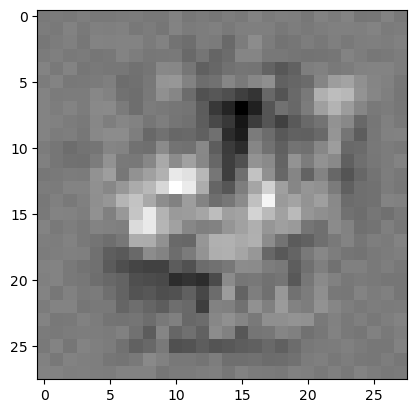

epoch: [56:100


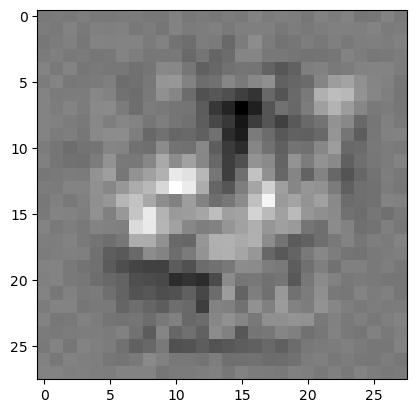

epoch: [57:100


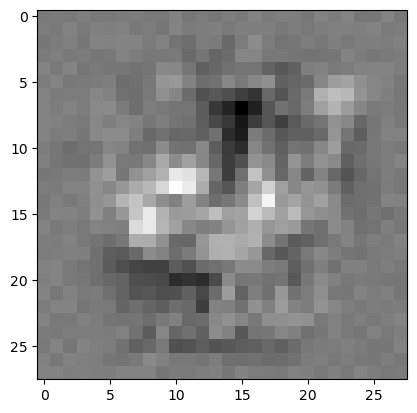

epoch: [58:100


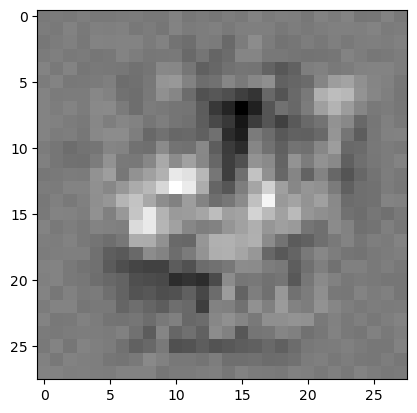

epoch: [59:100


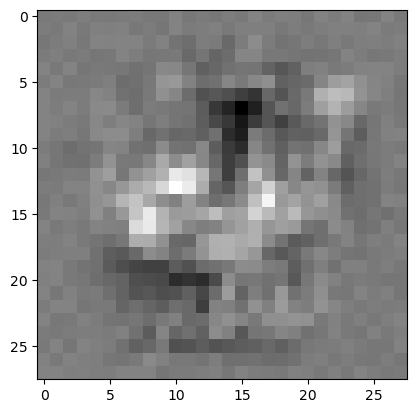

epoch: [60:100


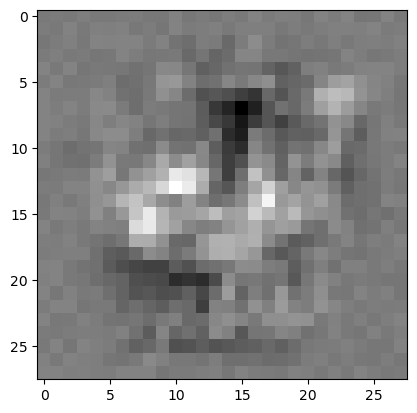

epoch: [61:100


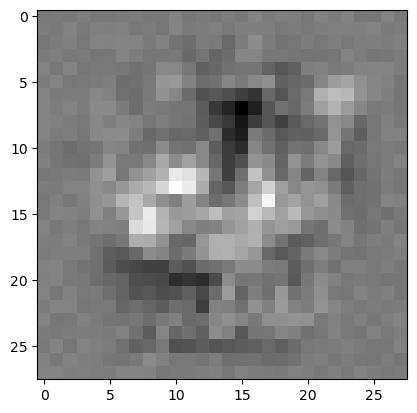

epoch: [62:100


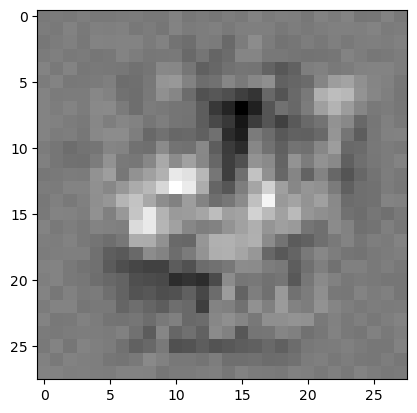

epoch: [63:100


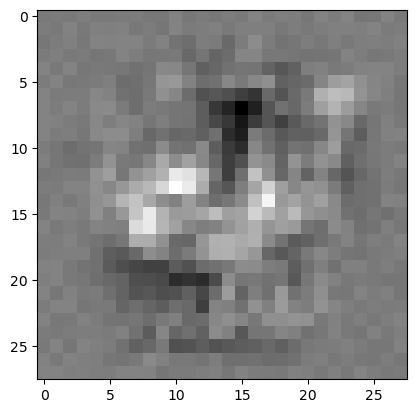

epoch: [64:100


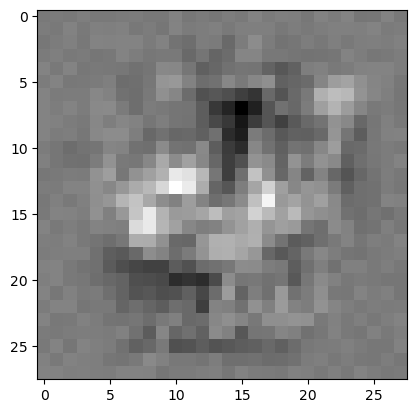

epoch: [65:100


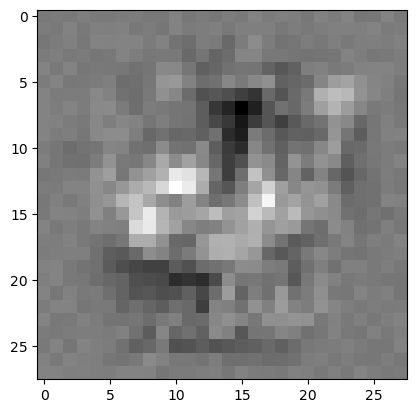

epoch: [66:100


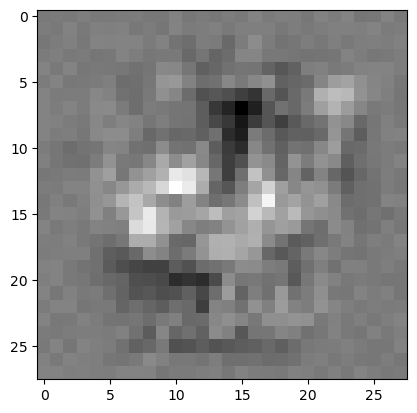

epoch: [67:100


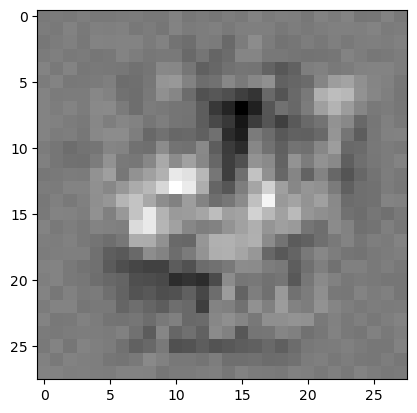

epoch: [68:100


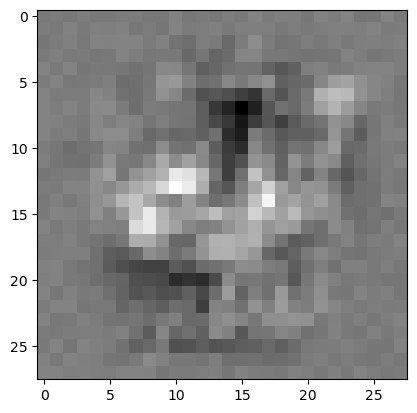

epoch: [69:100


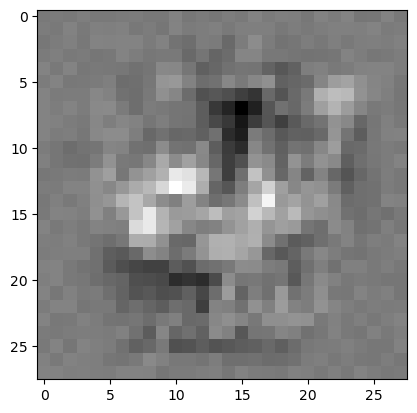

epoch: [70:100


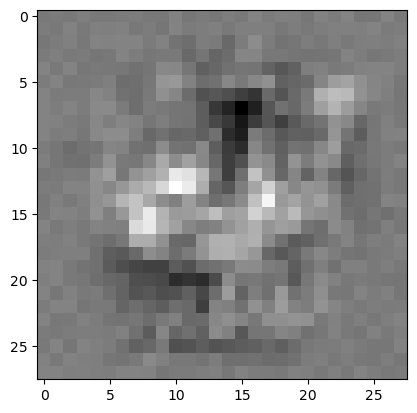

epoch: [71:100


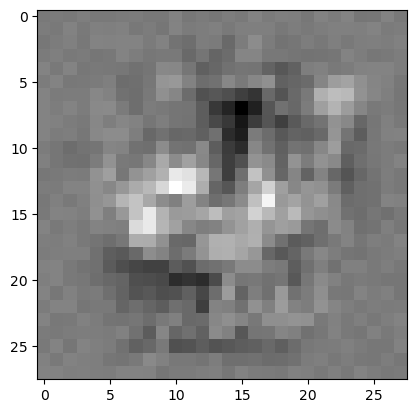

epoch: [72:100


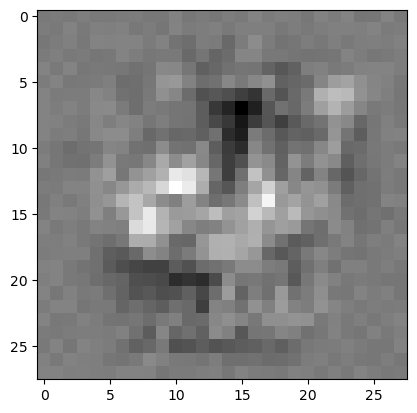

epoch: [73:100


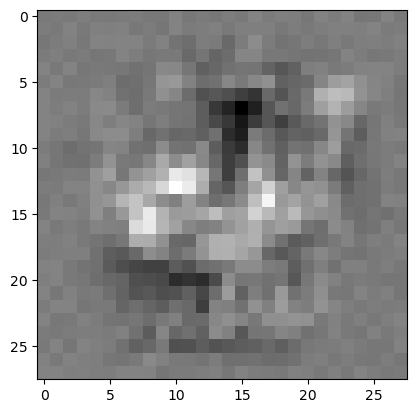

epoch: [74:100


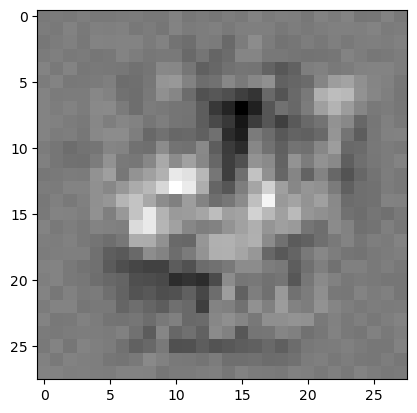

epoch: [75:100


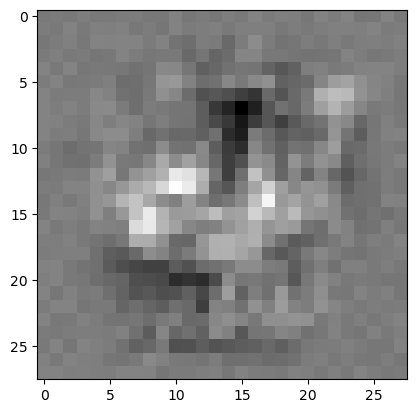

epoch: [76:100


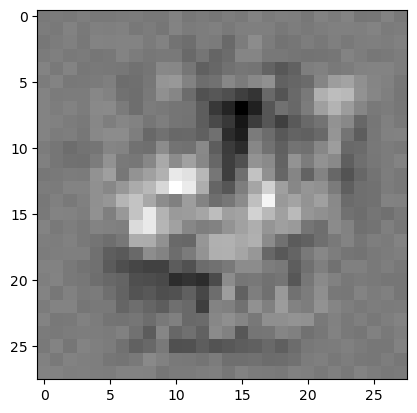

epoch: [77:100


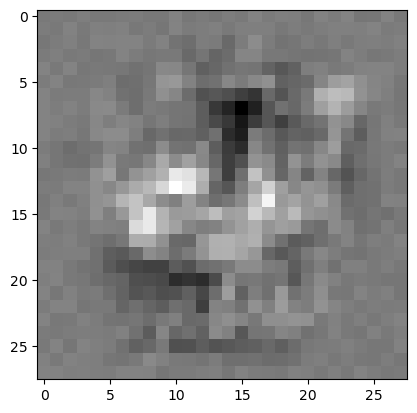

epoch: [78:100


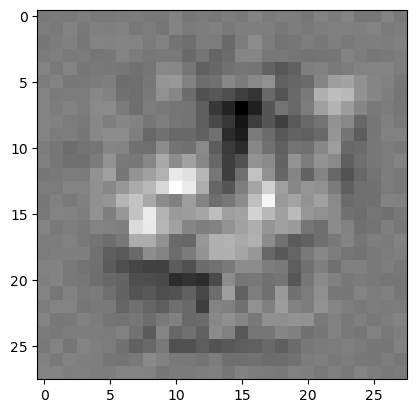

epoch: [79:100


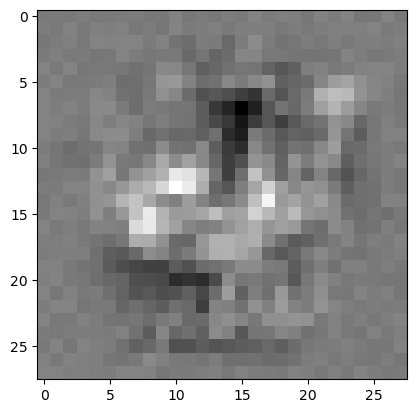

epoch: [80:100


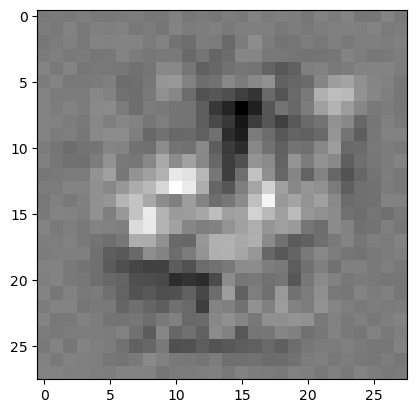

epoch: [81:100


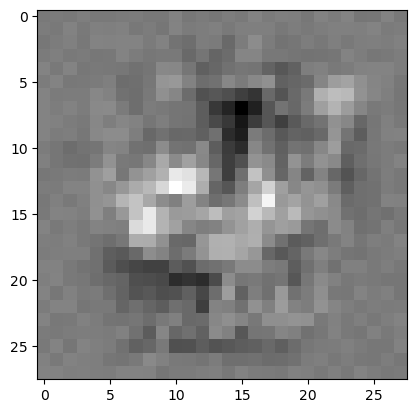

epoch: [82:100


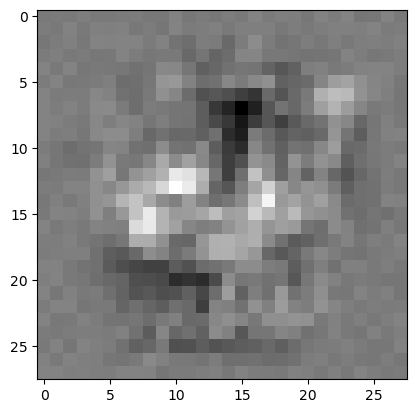

epoch: [83:100


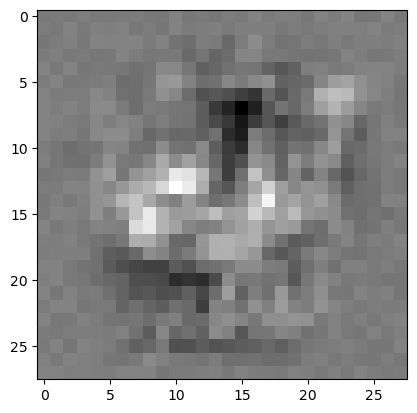

epoch: [84:100


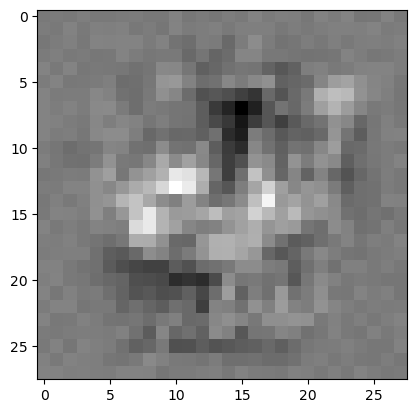

epoch: [85:100


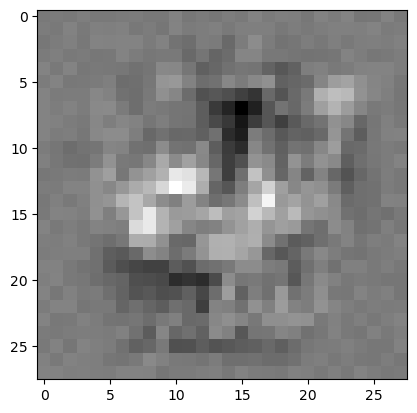

epoch: [86:100


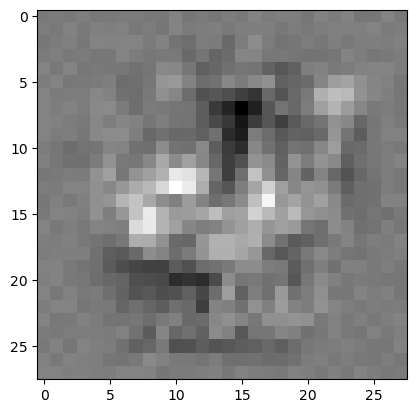

epoch: [87:100


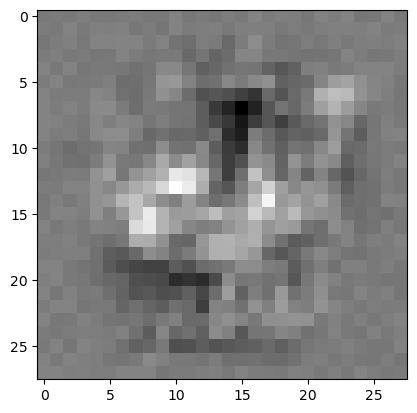

epoch: [88:100


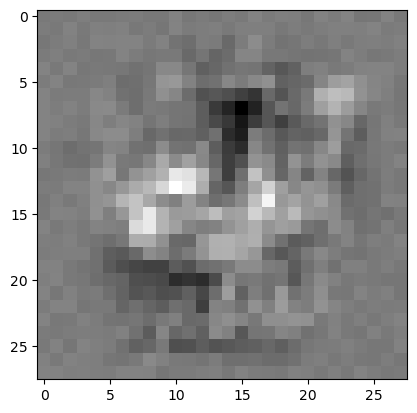

epoch: [89:100


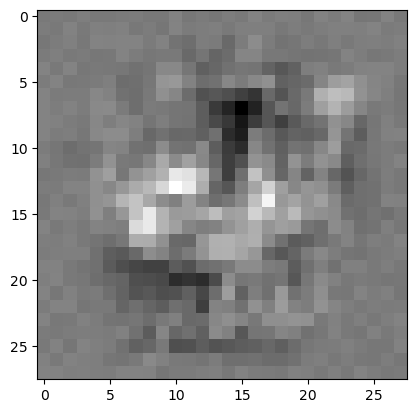

epoch: [90:100


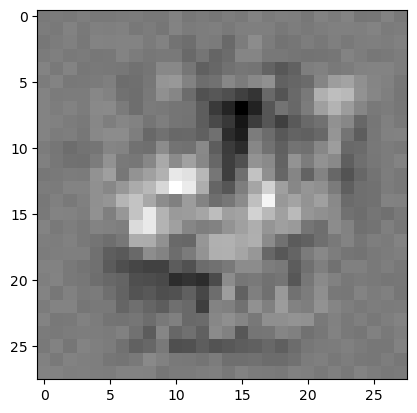

epoch: [91:100


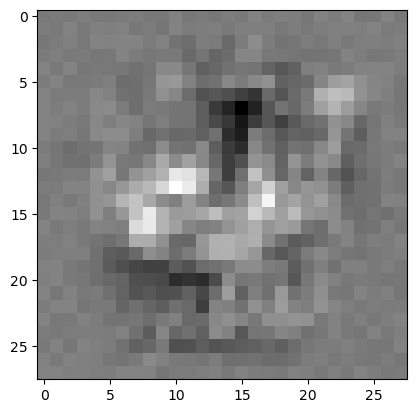

epoch: [92:100


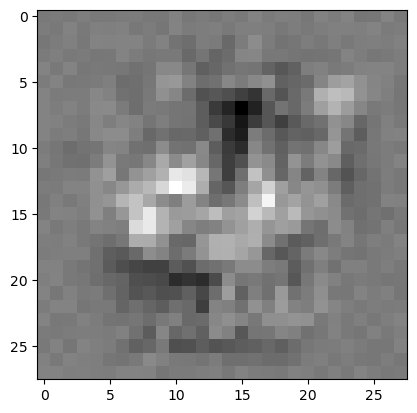

epoch: [93:100


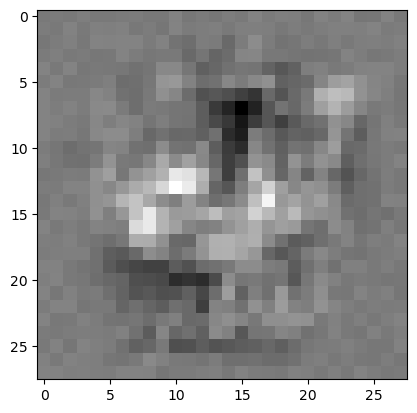

epoch: [94:100


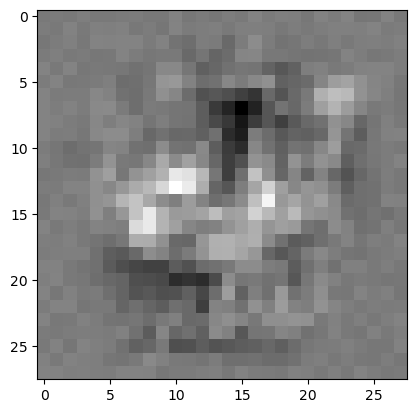

epoch: [95:100


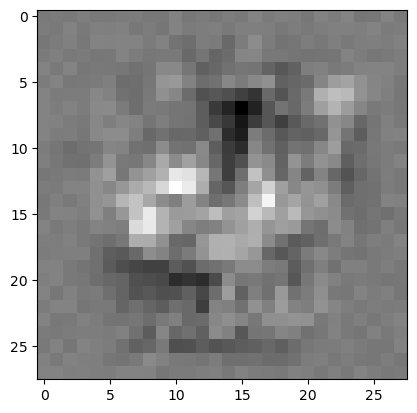

epoch: [96:100


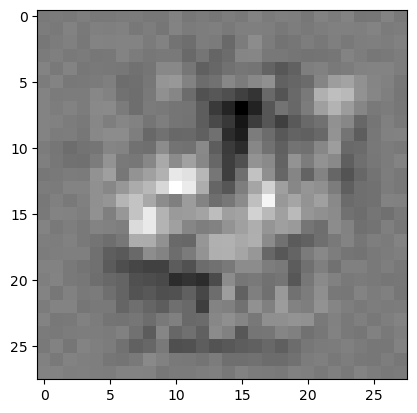

epoch: [97:100


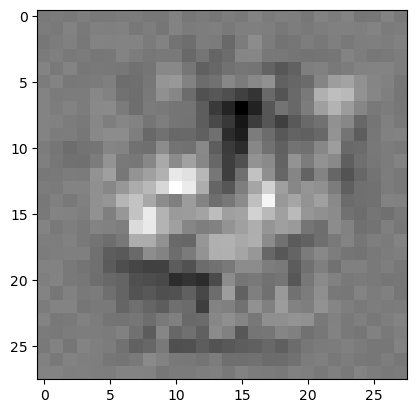

epoch: [98:100


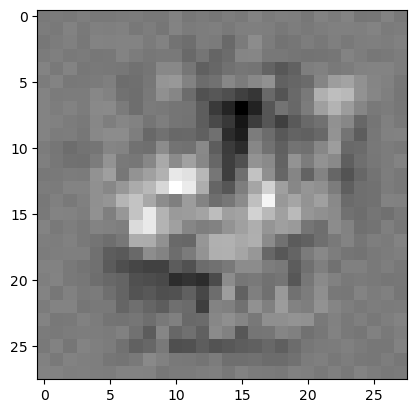

epoch: [99:100


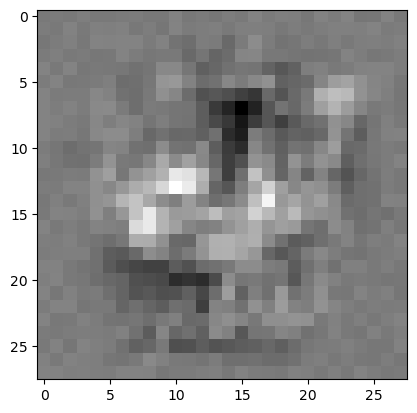

epoch: [100:100


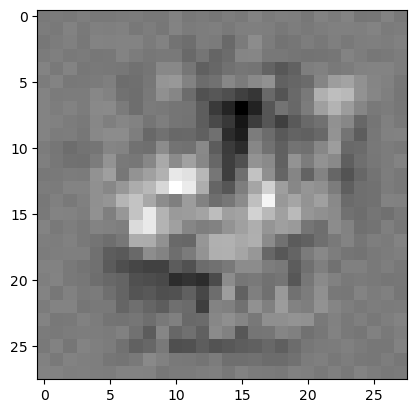

In [27]:
import numpy
losses = []
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)

    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)

    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    weights = model.state_dict()['weight']

    # Visualizando pesos da classe 3
    print(f'epoch: [{i+1}:{epochs}')
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()


<details>
<summary>Mostrar Resultado</summary>

```python
losses = []
import numpy

import numpy
zs = []

for i in range(epochs):
    # Transforma a entrada para uma dimensão
    inputs = Variable(x_train.view(-1, 28 * 28))
    # Predict da rede
    outputs = model(inputs)
    
    # z0 a z9
    zs.append(outputs[1].detach().numpy())

    # calcula a perda
    loss = criterion(outputs, Variable(y_train))

    # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    _, predicts = torch.max(outputs, 1)
    
    y_pred = predicts.data
    accuracy = (y_pred.numpy() == y_train.numpy()).mean()
    
    print('Epoch[{}/{}], loss: {:.6f}, acc: {:.6f}'
              .format(i+1, epochs, loss.data, accuracy))
    
    weights = model.state_dict()['weight']
    print('weights:', weights.shape)

    bias = model.state_dict()['bias']
    print('bias:   ', bias.shape)

    # Visualizando pesos da classe 3
    plt.imshow(weights[4, :].numpy().reshape((28,28)),cmap = 'gray')
    plt.show()
```

</details>

## Perguntas

1. Qual é o shape da matriz de entrada na rede? R - (1000 ,28, 28)
2. Qual é o shape da saída da rede? R - (1000, 10)
3. Qual é o número total de parâmetros da rede, incluindo o bias? (28 * 28 * 10 + 10) = 7850

# Aprendizados
